# Novartis Data Science Hiring challenge

# Import Library

In [1]:
import pandas as pd
import numpy as np
## Importing seaborn, matplotlab and scipy modules. 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import scipy
from sklearn.linear_model import LogisticRegression
import optuna

# Read and Describe the Dataset

In [2]:
# Read the Dataset
train_df = pd.read_csv("../input/Train.csv", index_col="INCIDENT_ID")
test_df = pd.read_csv("../input/Test.csv", index_col="INCIDENT_ID")
submit_df = pd.read_csv("../input/sample_submission.csv", index_col="INCIDENT_ID")

In [3]:
# First Five training data
train_df.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
# First Five test data
test_df.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
INCIDENT_ID,,,,,,,,,,,,,,,,
CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [5]:
train_df = train_df.drop('DATE', axis =1)
test_df = test_df.drop('DATE', axis =1)

In [6]:
# describe training dataset
train_df.describe()


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [7]:
# describe test dataset
test_df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


In [8]:
print (f"Train has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print (f"Test has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train has 23856 rows and 16 columns
Test has 15903 rows and 15 columns


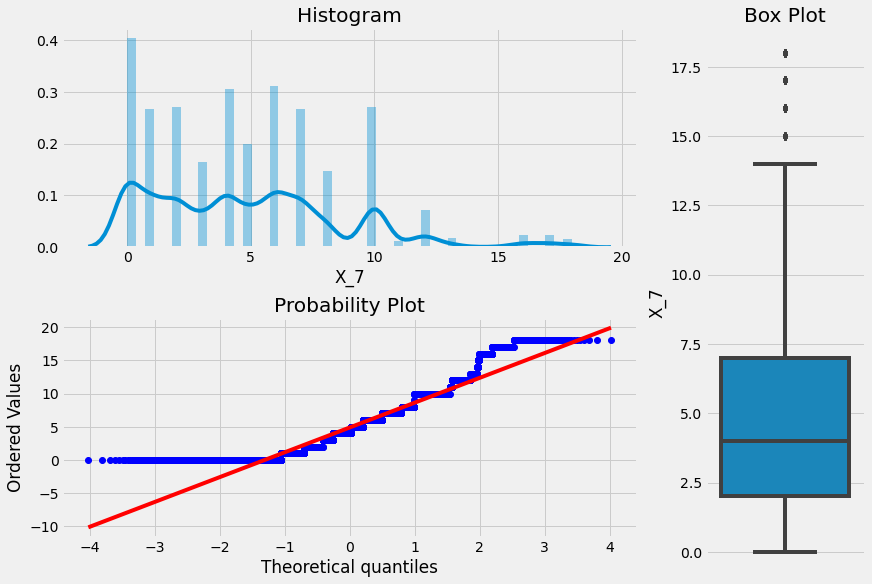

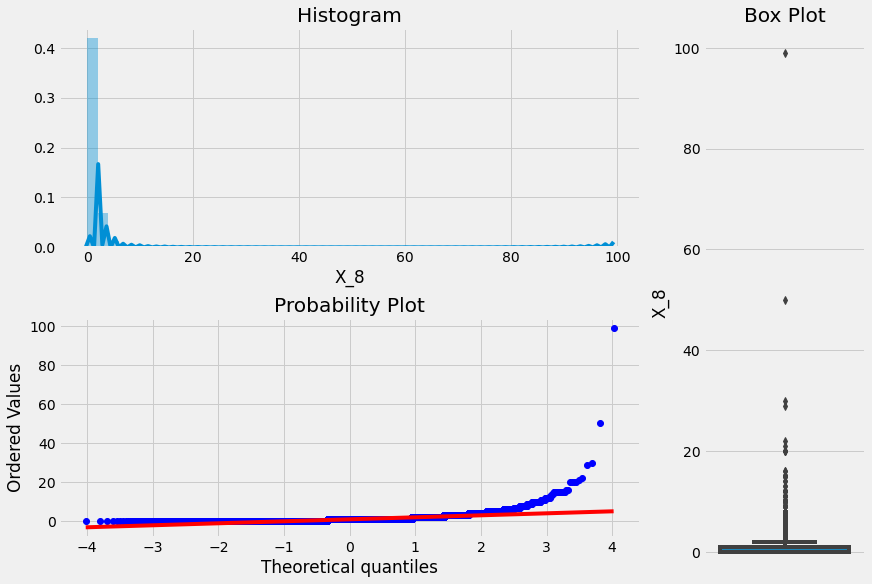

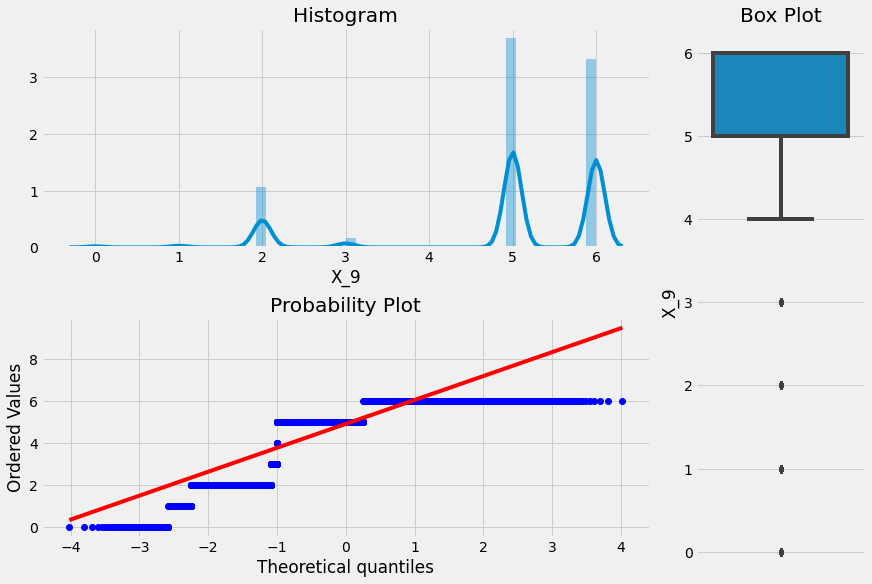

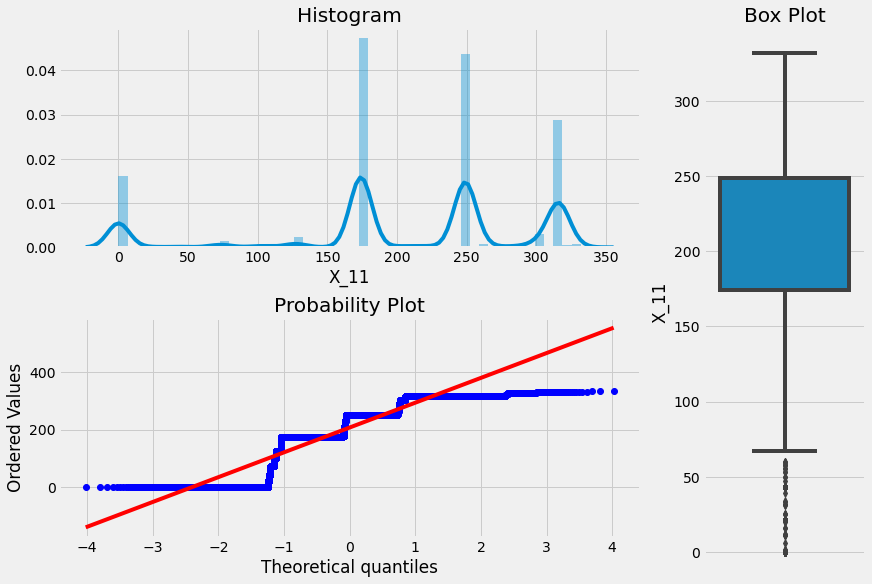

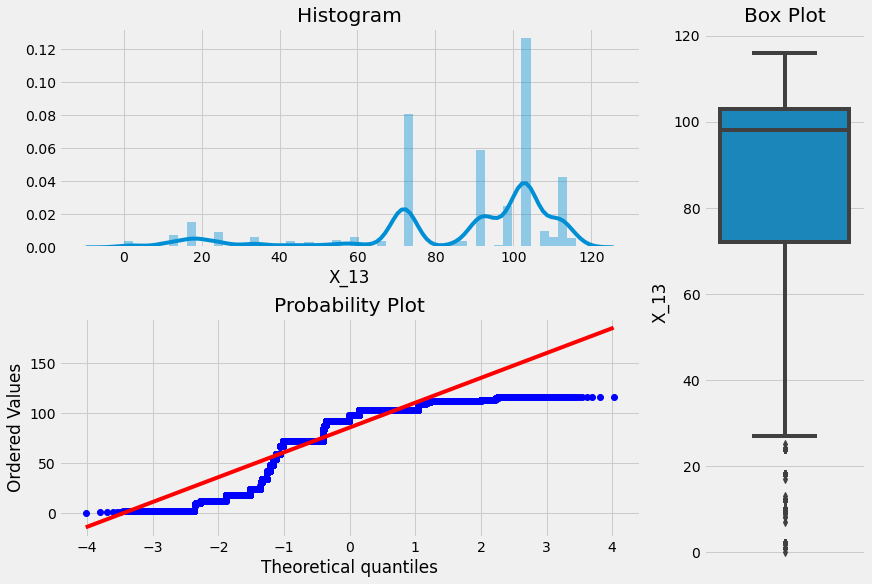

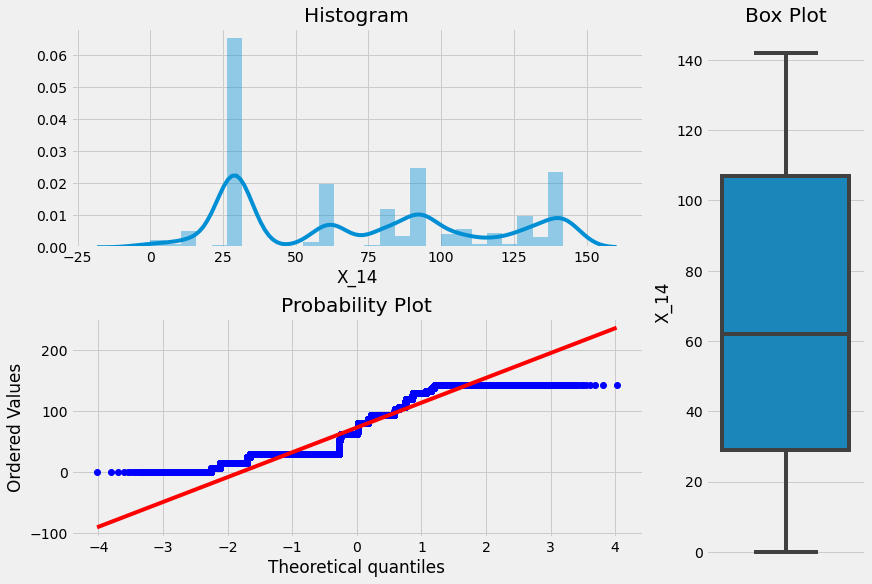

In [9]:
def plot_fn(df, feature):

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plot_fn(train_df, 'X_7')
plot_fn(train_df, 'X_8')
plot_fn(train_df, 'X_9')
plot_fn(train_df, 'X_11')
plot_fn(train_df, 'X_13')
plot_fn(train_df, 'X_14')

In [10]:
#skewness and kurtosis
print("Skewness: " + str(train_df['MULTIPLE_OFFENSE'].skew()))
print("Kurtosis: " + str(train_df['MULTIPLE_OFFENSE'].kurt()))


Skewness: -4.402997083245906
Kurtosis: 17.38784104120059


### Dataset contains both categorical and numerical features. Dataset is highly skew

In [11]:
# Function for Calculating missing data ratio in feature columns
def missing_ratio(data_mis):
    data_mis = (data_mis.isnull().sum() / len(data_mis)) * 100
    data_mis = data_mis.drop(data_mis[data_mis == 0].index).sort_values(ascending=False)
    data_mis = pd.DataFrame({'Percentage' :data_mis})
    data_mis['Id'] = data_mis.index
    data_mis.reset_index(drop=True,level=0, inplace=True)
    return data_mis#.head()

In [12]:
# Plot the missing feature columns by ratio
def missing_graph(mis):
    with sns.axes_style('whitegrid'):
        g = sns.catplot(x='Id', y='Percentage', data=mis,
                        aspect=1.5, height=8,kind="bar")

        g.set_xlabels('Features')
        g.fig.suptitle("Percentage of Missing Data")
    
        g.set_xticklabels(rotation=45, horizontalalignment='right')


In [13]:
# calculate percentage of missing data
train_mis = missing_ratio(train_df)
test_mis = missing_ratio(test_df)
train_mis

,Percentage,Id
0,0.762911,X_12


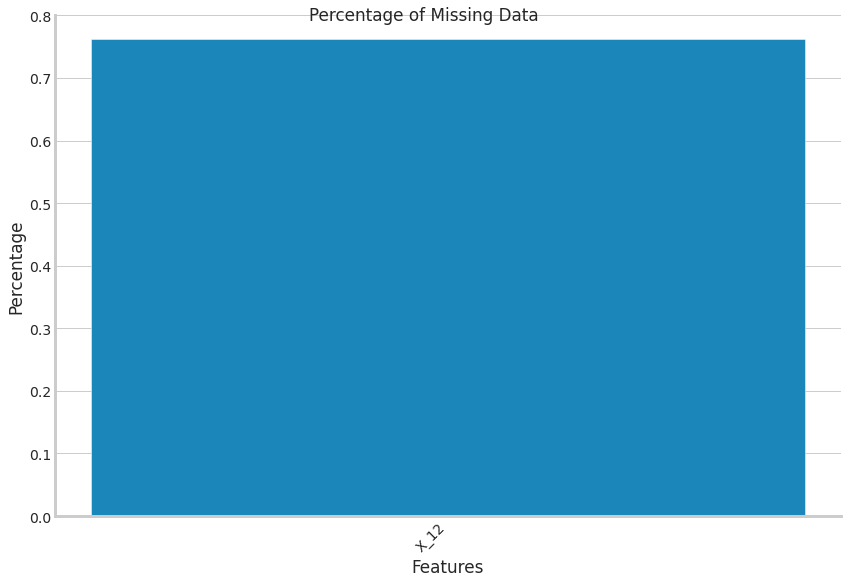

In [14]:
# missing ratio graph in training data
missing_graph(train_mis)


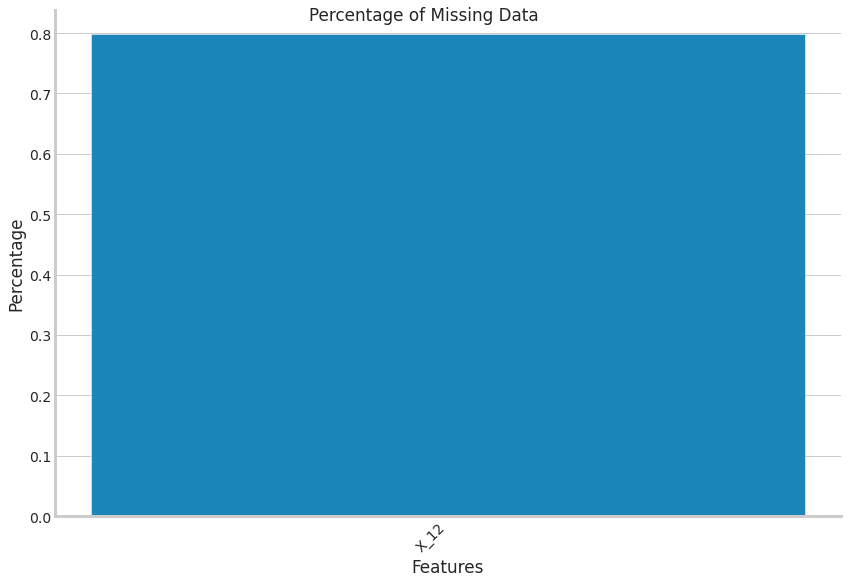

In [15]:


# missing ratio graph in test data
missing_graph(test_mis)



In [16]:
train_df['X_12'] = train_df['X_12'].fillna(-1)
test_df['X_12'] = test_df['X_12'].fillna(-1)

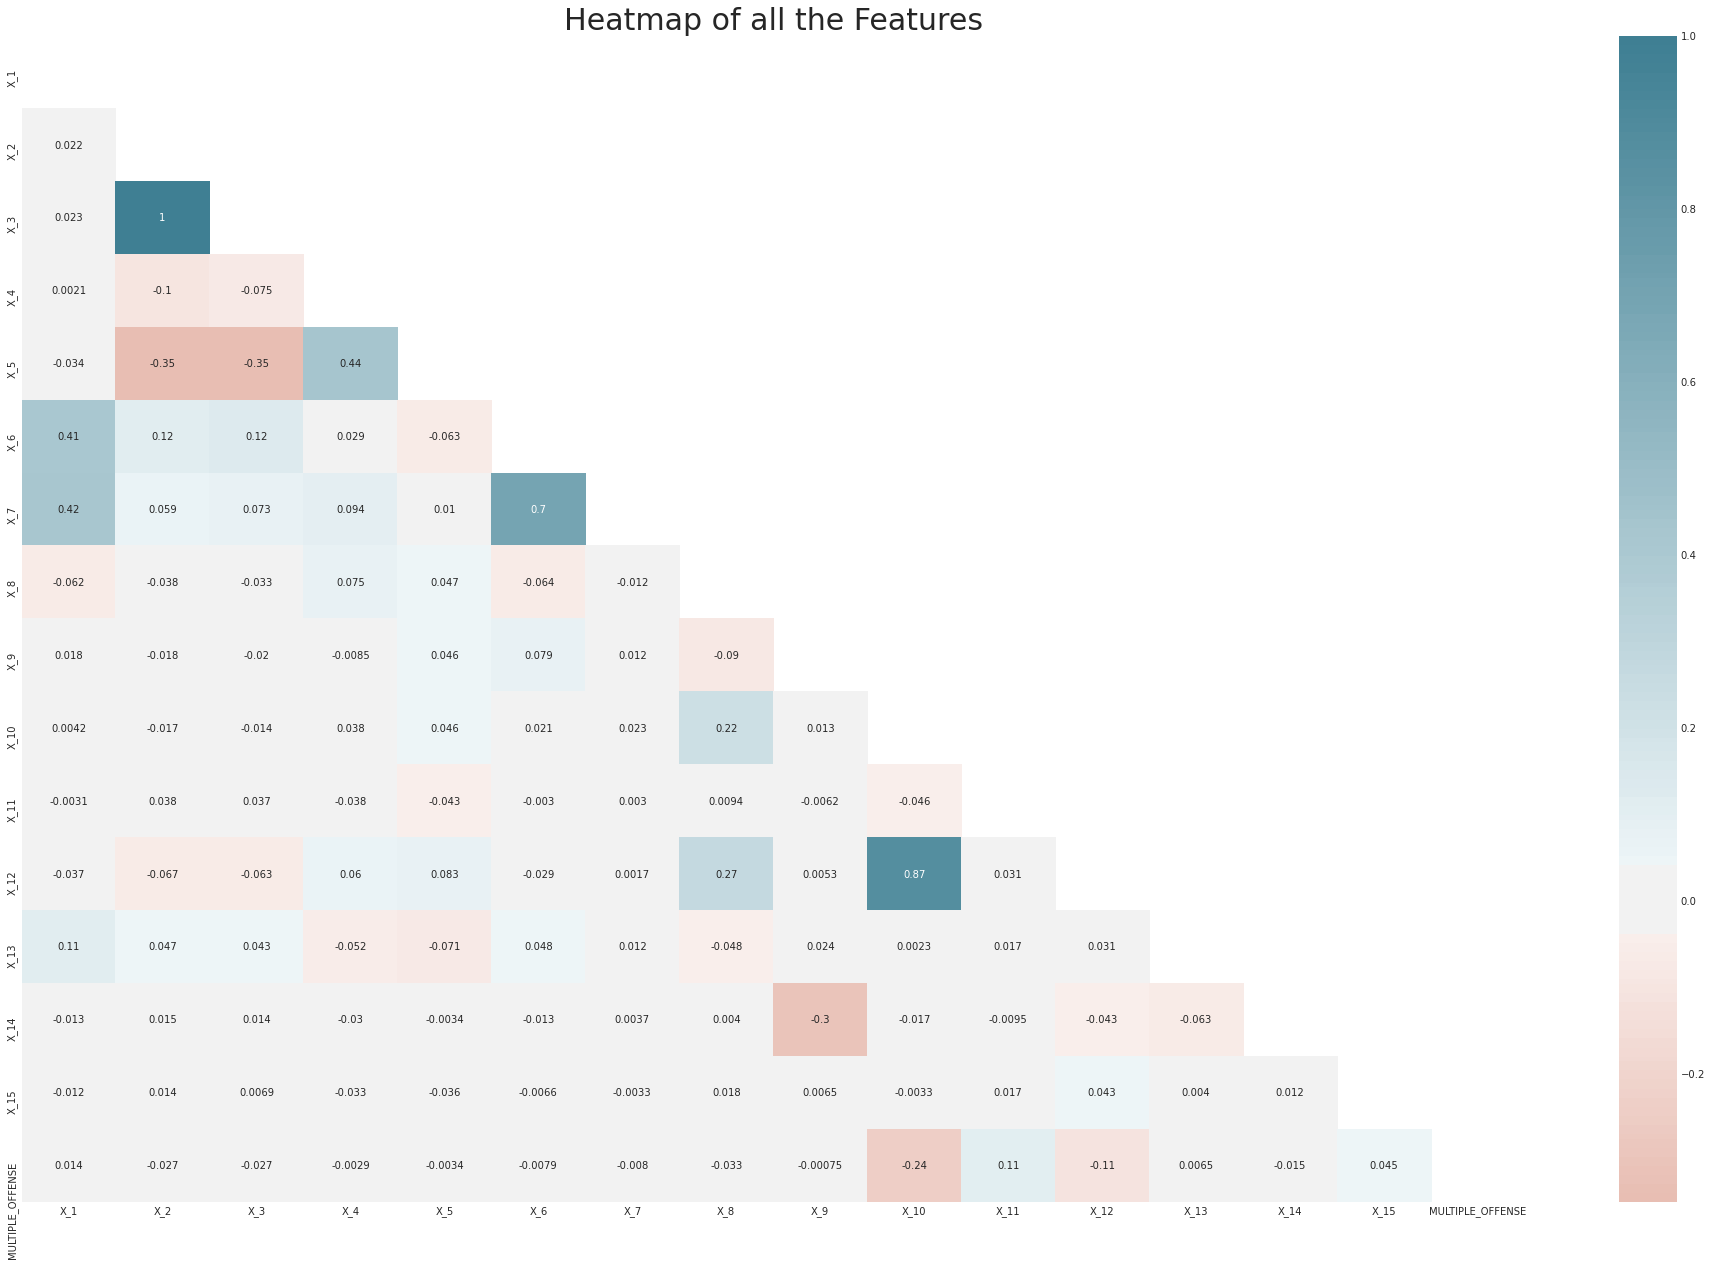

In [17]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train_df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);



In [18]:
Ytrain=train_df['MULTIPLE_OFFENSE']
train_df=train_df[list(test_df)]
all_data=pd.concat((train_df, test_df))
print(train_df.shape, test_df.shape, all_data.shape)

encoded=pd.get_dummies(all_data, columns=all_data.columns, sparse=True)
encoded=encoded.sparse.to_coo()
encoded=encoded.tocsr()

(23856, 15) (15903, 15) (39759, 15)


In [19]:
Xtrain=encoded[:len(train_df)]
Xtest=encoded[len(train_df):]


kf=StratifiedKFold(n_splits=10)


def objective(trial):
    C=trial.suggest_loguniform('C', 10e-10, 10)
    model=LogisticRegression(C=C, class_weight='balanced',max_iter=10000, solver='lbfgs', n_jobs=-1)
    score=-cross_val_score(model, Xtrain, Ytrain, cv=kf, scoring='roc_auc').mean()
    return score
study=optuna.create_study()


study.optimize(objective, n_trials=20)

print(study.best_params)

#print(-study.best_value)
params=study.best_params

[I 2020-06-14 20:41:04,801] Finished trial#0 with value: -0.999993437229867 with parameters: {'C': 3.269381934391579}. Best is trial#0 with value: -0.999993437229867.
[I 2020-06-14 20:41:05,501] Finished trial#1 with value: -0.9563835549496197 with parameters: {'C': 5.563499884361916e-05}. Best is trial#0 with value: -0.999993437229867.
[I 2020-06-14 20:41:06,204] Finished trial#2 with value: -0.9536644773746848 with parameters: {'C': 1.805923651476385e-06}. Best is trial#0 with value: -0.999993437229867.
[I 2020-06-14 20:41:06,624] Finished trial#3 with value: -0.953572058688877 with parameters: {'C': 1.7753559271955138e-08}. Best is trial#0 with value: -0.999993437229867.
[I 2020-06-14 20:41:09,548] Finished trial#4 with value: -0.999960628059694 with parameters: {'C': 0.2613494009994962}. Best is trial#0 with value: -0.999993437229867.
[I 2020-06-14 20:41:10,538] Finished trial#5 with value: -0.9795670531690384 with parameters: {'C': 0.0010105479707865142}. Best is trial#0 with valu

{'C': 9.667659376074669}


In [20]:
params['C']

9.667659376074669

In [21]:
model=LogisticRegression(C=params['C'], class_weight='balanced',max_iter=10000, solver='lbfgs', n_jobs=-1)
model.fit(Xtrain, Ytrain)
predictions=model.predict_proba(Xtest)[:,1]
# submit_df['MULTIPLE_OFFENSE']=predictions
# submit_df.to_csv('submission.csv')
# submit_df.head()


## Given Sumbission file has not all "INCIDENT_ID" of test dataset 

In [22]:
predictions =np.round(predictions)

In [23]:
ID = test_df.index

In [24]:
submission = pd.DataFrame({'INCIDENT_ID':ID, 'MULTIPLE_OFFENSE': predictions})

In [25]:
submission.head()


,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1.0
1,CR_103520,1.0
2,CR_196089,1.0
3,CR_112195,1.0
4,CR_149832,1.0


In [26]:
submission.to_csv('submission.csv', index=False)
